# 作業:
    請嘗試改用CIFAR100

# Import Library

In [3]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [5]:
(X_img_train,y_label_train), (X_img_test,y_label_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 239s 1us/step


In [7]:
X_img_train.shape

(50000, 32, 32, 3)

In [8]:
# EDA
# 看資料數量、維度
print(f"X_img_train:{X_img_train.shape}")
print(f"y_label_train:{y_label_train.shape}")
print(f"X_img_test:{X_img_test.shape}")
print(f"y_label_test:{y_label_test.shape}")

X_img_train:(50000, 32, 32, 3)
y_label_train:(50000, 1)
X_img_test:(10000, 32, 32, 3)
y_label_test:(10000, 1)


In [9]:
X_img_test[0].shape

(32, 32, 3)

In [17]:
# y_label_train 數值與筆數(資料是否平衡)
unique_elements, counts_elements = np.unique(y_label_train, return_counts=True)
# print(np.asarray((unique_elements, counts_elements)))
print(dict(zip(unique_elements, counts_elements)))

{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


In [30]:
y_label_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

No handles with labels found to put in legend.


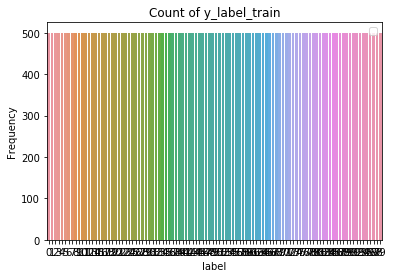

In [34]:
# 或畫圖來看
import matplotlib.pyplot as plt
import seaborn as sns
# 將 bar 與 Kde 同時呈現: distplot
sns.countplot(y_label_train.reshape(-1))
plt.legend()
plt.xlabel('label'); plt.ylabel('Frequency'); plt.title('Count of y_label_train');
plt.show()

In [53]:
# 看 X_img 
def plot_images_labels_prediction(images,labels,idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+",category:"+str(labels[i][0])
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

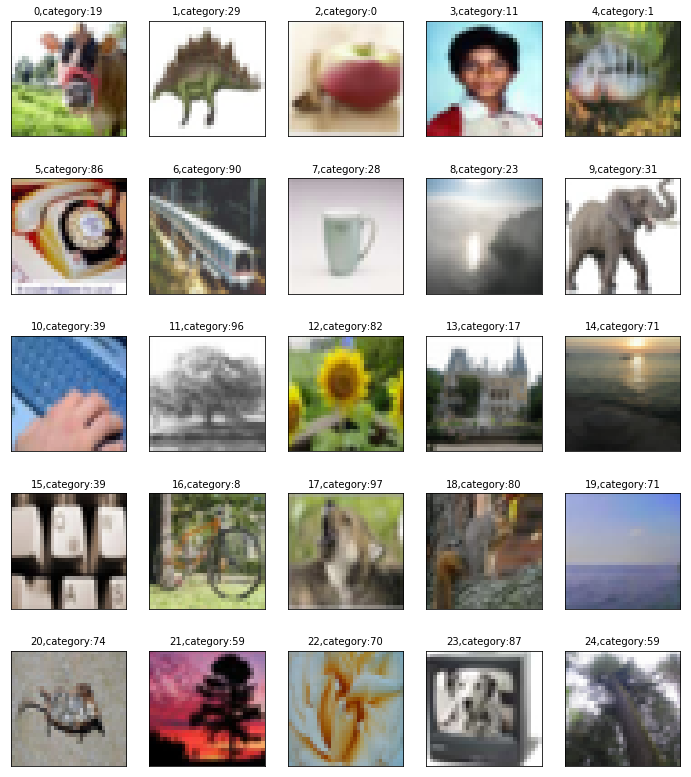

In [54]:
plot_images_labels_prediction(X_img_train,y_label_train,0)

# Image normalize 

In [55]:
X_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [56]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [58]:
X_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [59]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [60]:
y_label_train_OneHot.shape

(50000, 100)

In [61]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.